Plot saved and spent money for two projects, one being a saver and the other being a spender.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def convert_datetime(x):
    if not isinstance(x, str):
        return x
    # Ignore time zone info
    if 'T' in x and 'Z' in x:
        x = x.split('T')[0]
    try:
        temp = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    except:
        try:
            temp = datetime.strptime(x, '%Y-%m-%d')
        except:
            try:
                temp = datetime.strptime(x, '%m/%d/%Y')
            except:
                try:
                    temp = datetime.strptime(x, '%m/%d/%Y %H:%M:%S')
                except:
                    temp = datetime.strptime(x, '%m/%d/%Y %H:%M')
    return temp

In [3]:
def get_data(df_oc):
    # Plot
    balances = []
    expenses = []
    gains = []
    dates = []
    for index, row in df_oc.iterrows():
        date = row['Transaction Date']
        dates.append(convert_datetime(date))
        amount = row['Transaction Amount']
        if amount > 0:
            if len(gains) == 0 and len(expenses) == 0:
                gains.append(amount)
                expenses.append(0)
            else:
                gains.append(gains[-1]+amount)
                expenses.append(expenses[-1])
        elif amount < 0:
            if len(gains) == 0 and len(expenses) == 0:
                print('expenses before gain!')
                gains.append(0)
                expenses.append((-1*amount))
            else:
                expenses.append(expenses[-1]+(-1*amount))
                gains.append(gains[-1])
        else:
            if len(gains) == 0 and len(expenses) == 0:
                gains.append(0)
                expenses.append(0)
            else:
                gains.append(gains[-1])
                expenses.append(expenses[-1])
        balances.append(gains[-1]-expenses[-1])
    return (dates, gains, expenses, balances)

In [4]:
def thousands(x, pos):
    return '$%1iK' % (x*1e-3)

In [5]:
def plot_oc_data(url_name):
    plt.clf()
    path = '../data_mining/files/20190719_OpenCollective CSV'
    directory = os.fsencode(path)
    for file in os.listdir(directory):
        # Open csv file
        file = file.decode("utf-8")
        name = file.split('--')[0]
        if name == url_name.lower():
            df_oc = pd.read_csv(path+'/'+file)
            df_oc = df_oc.iloc[::-1]
            (dates, gains, expenses, balances) = get_data(df_oc)
            x = dates
            y = [expenses, np.subtract(gains,expenses)]
            pal = ['#85BB65', '#E8E9C9']
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
            formatter = FuncFormatter(thousands)
            plt.gca().yaxis.set_major_formatter(formatter)
            plt.stackplot(x, y, labels=['Spent', 'Saved'], colors=pal)
            plt.legend(loc='upper left', prop={'size': 22}, frameon=False)
            plt.margins(0.005,0)
            plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
            plt.rc('xtick',labelsize=22)
            plt.rc('ytick',labelsize=22)
            plt.xticks(rotation=27)
            fig = plt.gcf()
            fig.set_size_inches(7, 3)
            sns.despine(fig=fig)

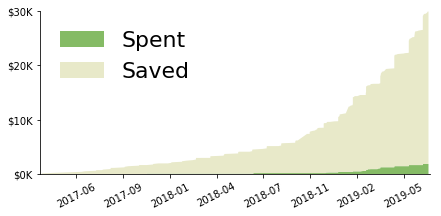

In [6]:
plot_oc_data('bower')

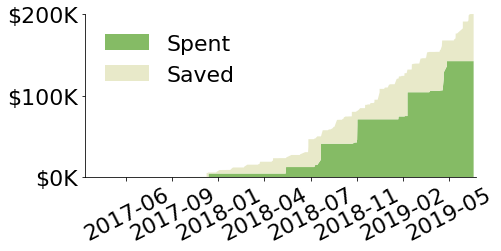

In [7]:
plot_oc_data('material-ui')